In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import umap
import glob
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
#read data file

path = r'D:\Data\cav_data' # use your path
all_files = glob.glob(path + "/fulldata*.csv")
print(all_files)
file_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    file_list.append(df)

total_data_df = pd.concat(file_list, axis=0, ignore_index=True)

['D:\\Data\\cav_data\\fulldata_with_maxmin.csv']


In [3]:
print(total_data_df.shape)
total_data_df.head()

(107569, 288)


,fDie1wflow_en0,fDie1wflow_en1,fDie1wflow_en2,fDie1wflow_en3,fDie1wflow_en4,fDie1wflow_mse,fDie1wflow_mae,fDie2wflow_en0,fDie2wflow_en1,fDie2wflow_en2,...,Cast_date,Shift,Shot_no,dayOfWeek,cav1_defect,cav2_defect,defect,defect_smoothed,max_ratio,min_ratio
0,21.692999,0.759790,-0.968287,13.580341,-0.567633,0.002722,0.038137,9.908647,1.283877,-0.999141,...,2018-01-15,1,5,0,0,0,0,0.0,NaN,NaN
1,22.802261,1.165540,-0.969840,15.000215,-0.767543,0.002549,0.035166,9.719274,1.268317,-0.999214,...,2018-01-15,1,6,0,0,0,0,0.0,NaN,NaN
2,23.670288,1.490633,-0.969832,15.979490,-0.831797,0.002225,0.031885,9.586231,0.992506,-0.999257,...,2018-01-15,1,7,0,0,0,0,0.0,NaN,NaN
3,23.920792,2.118496,-0.968945,15.828067,-0.853646,0.001940,0.026800,9.413850,0.393041,-0.999068,...,2018-01-15,1,8,0,0,0,0,0.0,NaN,NaN
4,24.256344,2.081036,-0.970542,16.486008,-0.890179,0.001000,0.020291,9.127824,0.392960,-0.999210,...,2018-01-15,1,9,0,0,0,0,0.0,NaN,NaN


In [4]:
total_data_df.head()
deft=total_data_df['defect']
cav1_deft=total_data_df['cav1_defect']
cav2_deft=total_data_df['cav2_defect']
defect_smoothed=total_data_df['defect_smoothed']
parts=total_data_df['Part']

In [5]:
#Fill nan values
total_data_df.fillna(0,inplace=True)

In [6]:
total_data_df = total_data_df.drop([ 'Die', 'Cast_date','cav1_defect','cav2_defect','Shot_no','Shift','dayOfWeek',], axis=1)
total_data_df.shape

(107569, 281)

In [7]:
#feature and label creation
features_df = total_data_df.drop(['defect_smoothed','max_ratio','min_ratio','defect','Part'], axis=1)
#features_df_die2 = pd.get_dummies(features_df_die2)
labels_df = total_data_df.loc[:, ['defect']]
features_df.head()
features_df.shape
labels_df.shape

(107569, 1)

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
print(scaled_features.shape)


(107569, 276)


Total variance explained: 0.9473996948895201


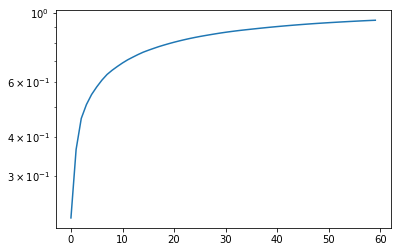

In [9]:
#PCA(choosing data with upto 0.95 variance, returns trans_features)

pca = PCA(n_components=60)
trans_features= pca.fit_transform(scaled_features)

print('Total variance explained:', pca.explained_variance_ratio_.sum())
plt.semilogy(pca.explained_variance_ratio_.cumsum())



In [10]:
gmm = GaussianMixture(n_components=8, covariance_type='full')
gmm_label=gmm.fit_predict(trans_features)

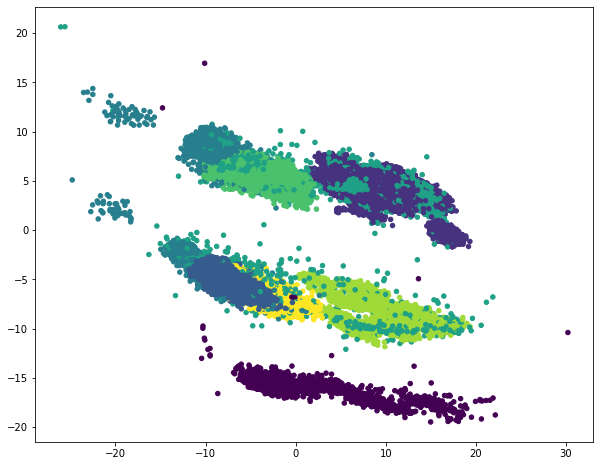

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(trans_features[:, 0], trans_features[:, 1],c=gmm_label ,s=20, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200);

In [37]:
stack_feats_gmmlabel=np.column_stack((trans_features, gmm_label))
#np.unique(defect_smoothed)

In [38]:
#append any label to the features with clustered labels for visualizing
label_to_append = np.column_stack((stack_feats_gmmlabel, deft))
#label_with_parts= np.column_stack((label_to_append, parts))
clustered_data = pd.DataFrame(label_to_append, columns = ["feat_%d" % (i + 1) for i in range(62)])
clustered_data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62
0,10.323606,-18.329546,35.274664,2.362969,-11.269369,3.419172,-0.267312,-0.700623,0.696448,-9.532322,...,-0.006638,1.683889,0.747882,-3.403728,-0.164639,-0.157536,3.947111,0.446435,0.0,0.0
1,11.706244,-18.305519,30.350956,1.318946,-10.127825,3.350460,0.188629,9.340361,-5.314800,0.700339,...,-0.081751,1.532911,-0.451248,-3.362520,-0.541375,-0.481920,3.913671,0.113250,0.0,0.0
2,12.824335,-18.592413,29.724835,2.160639,-10.578908,3.772975,0.135328,9.783472,-6.450265,0.077288,...,-0.137064,1.659815,-0.869945,-3.778491,-0.895022,-0.158901,4.863906,-0.375593,0.0,0.0
3,8.678853,2.662660,8.257590,-0.017294,-1.021185,1.862675,1.341038,6.716124,7.579411,-0.109736,...,-1.568463,1.034030,0.228820,-1.975198,-1.761681,-0.304608,4.357125,0.466304,4.0,0.0
4,10.893335,2.555274,3.591943,2.302606,-0.630747,1.342678,1.527172,7.644323,8.198813,-0.351098,...,-1.190928,1.265216,0.981182,-0.423094,-0.208605,-0.050067,2.565809,-0.103025,4.0,0.0


In [39]:
#clustered_data.groupby(total_data_df.defect).feat_61.value_counts()
clustered_data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62
0,10.323606,-18.329546,35.274664,2.362969,-11.269369,3.419172,-0.267312,-0.700623,0.696448,-9.532322,...,-0.006638,1.683889,0.747882,-3.403728,-0.164639,-0.157536,3.947111,0.446435,0.0,0.0
1,11.706244,-18.305519,30.350956,1.318946,-10.127825,3.350460,0.188629,9.340361,-5.314800,0.700339,...,-0.081751,1.532911,-0.451248,-3.362520,-0.541375,-0.481920,3.913671,0.113250,0.0,0.0
2,12.824335,-18.592413,29.724835,2.160639,-10.578908,3.772975,0.135328,9.783472,-6.450265,0.077288,...,-0.137064,1.659815,-0.869945,-3.778491,-0.895022,-0.158901,4.863906,-0.375593,0.0,0.0
3,8.678853,2.662660,8.257590,-0.017294,-1.021185,1.862675,1.341038,6.716124,7.579411,-0.109736,...,-1.568463,1.034030,0.228820,-1.975198,-1.761681,-0.304608,4.357125,0.466304,4.0,0.0
4,10.893335,2.555274,3.591943,2.302606,-0.630747,1.342678,1.527172,7.644323,8.198813,-0.351098,...,-1.190928,1.265216,0.981182,-0.423094,-0.208605,-0.050067,2.565809,-0.103025,4.0,0.0


In [58]:
clustered_data.rename(columns={"feat_62": "defect", "feat_61": "cluster_label"},inplace=True)

In [59]:
clustered_data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,cluster_label,defect
0,10.323606,-18.329546,35.274664,2.362969,-11.269369,3.419172,-0.267312,-0.700623,0.696448,-9.532322,...,-0.006638,1.683889,0.747882,-3.403728,-0.164639,-0.157536,3.947111,0.446435,0.0,0.0
1,11.706244,-18.305519,30.350956,1.318946,-10.127825,3.350460,0.188629,9.340361,-5.314800,0.700339,...,-0.081751,1.532911,-0.451248,-3.362520,-0.541375,-0.481920,3.913671,0.113250,0.0,0.0
2,12.824335,-18.592413,29.724835,2.160639,-10.578908,3.772975,0.135328,9.783472,-6.450265,0.077288,...,-0.137064,1.659815,-0.869945,-3.778491,-0.895022,-0.158901,4.863906,-0.375593,0.0,0.0
3,8.678853,2.662660,8.257590,-0.017294,-1.021185,1.862675,1.341038,6.716124,7.579411,-0.109736,...,-1.568463,1.034030,0.228820,-1.975198,-1.761681,-0.304608,4.357125,0.466304,4.0,0.0
4,10.893335,2.555274,3.591943,2.302606,-0.630747,1.342678,1.527172,7.644323,8.198813,-0.351098,...,-1.190928,1.265216,0.981182,-0.423094,-0.208605,-0.050067,2.565809,-0.103025,4.0,0.0


In [60]:
#groupby based on gmm labels(cluster output label,new_data is a list with 7 groups)
def group_by(dataframe,column_name):
    gb = dataframe.groupby(column_name)    
    group_data=[gb.get_group(x) for x in gb.groups]
    return group_data

#method to save all the dataframes of clusters in a list
def clus_individual_df(group_cluster_data,empty_list):
    for agv in range(len(group_cluster_data)):
        agv_name=['cluster_%d' %agv]
        #print(agv_name)
        agv_name= pd.DataFrame(group_cluster_data[agv])
        empty_list.append(agv_name)
        agv=+1
    return empty_list

In [61]:
#groupby based on gmm labels(cluster output label,new_data is a list with 7 groups)
gb = clustered_data.groupby('cluster_label')    
new_data=[gb.get_group(x) for x in gb.groups]
len(new_data)

8

In [62]:
list_df=[]
cluster_df_list=clus_individual_df(new_data,list_df)

In [63]:
data_label_0=new_data[0]
data_label_1=new_data[1]
data_label_2=new_data[2]
data_label_3=new_data[3]
data_label_4=new_data[4]
data_label_5=new_data[5]
data_label_6=new_data[6]
data_label_7=new_data[7]


In [295]:
#convert lists into seven dataframes
data_0 = pd.DataFrame(data_label_0) 
data_1= pd.DataFrame(data_label_1) 
data_2 = pd.DataFrame(data_label_2) 
data_3= pd.DataFrame(data_label_3)
data_4 = pd.DataFrame(data_label_4) 
data_5= pd.DataFrame(data_label_5)
data_6= pd.DataFrame(data_label_6)
data_7= pd.DataFrame(data_label_7)
data_0.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,cluster_label,defect
0,10.323606,-18.329546,35.274664,2.362969,-11.269369,3.419172,-0.267312,-0.700623,0.696448,-9.532322,...,-0.006638,1.683889,0.747882,-3.403728,-0.164639,-0.157536,3.947111,0.446435,0.0,0.0
1,11.706244,-18.305519,30.350956,1.318946,-10.127825,3.350460,0.188629,9.340361,-5.314800,0.700339,...,-0.081751,1.532911,-0.451248,-3.362520,-0.541375,-0.481920,3.913671,0.113250,0.0,0.0
2,12.824335,-18.592413,29.724835,2.160639,-10.578908,3.772975,0.135328,9.783472,-6.450265,0.077288,...,-0.137064,1.659815,-0.869945,-3.778491,-0.895022,-0.158901,4.863906,-0.375593,0.0,0.0
259,9.483485,-17.694374,32.945815,2.587271,-12.579246,3.808126,-1.400206,-0.860956,-2.621674,-11.958302,...,-0.185098,1.415323,0.357623,-3.194638,-1.377473,0.559545,3.088293,0.776840,0.0,0.0
260,10.634044,-17.693538,30.037374,0.051408,-11.942437,3.630712,-0.931246,8.874193,-8.005328,-0.937723,...,-0.356958,1.535988,-1.123600,-3.500462,-1.134463,0.726916,4.928140,-0.223822,0.0,0.0


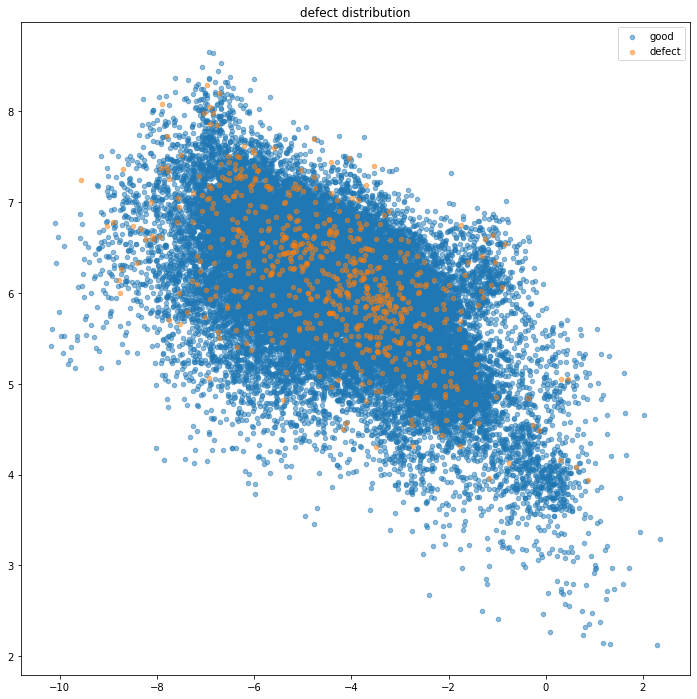

In [65]:
def plot_targets(df, x=0, y=1, target='defect'):
    sub_df0 = df[df[target] == 0]
    sub_df1 = df[df[target] == 1]
    data = (sub_df0, sub_df1)
    colors = ('C0', 'C1')
    group = ('good', 'defect')
    # create plot
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    for data_df, color, group in zip(data, colors, group):
        x_data = data_df.iloc[:, x].values
        y_data = data_df.iloc[:, y].values
        ax.scatter(x_data, y_data, alpha=0.5, c=color, s=20, label=group)
        
    plt.title(target+' distribution')
    plt.legend(loc='best')

plot_targets(data_5)

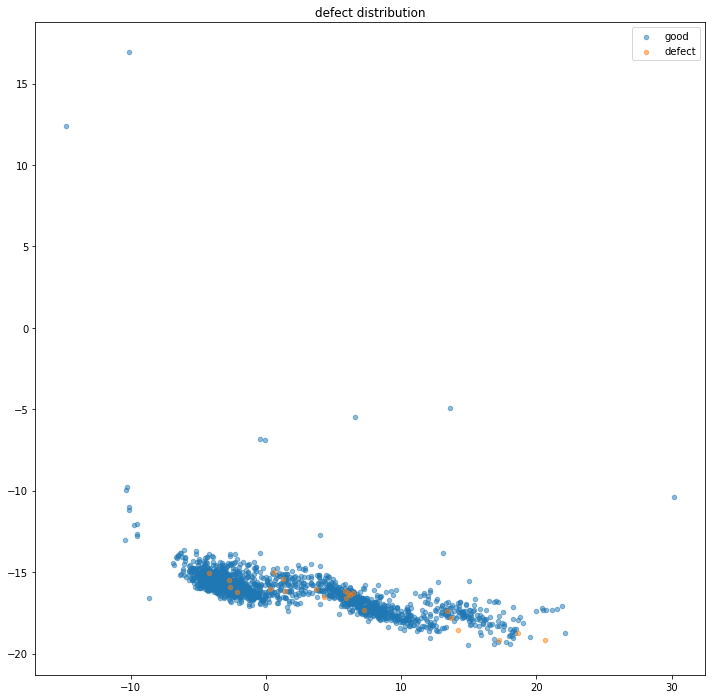

In [245]:
plot_targets(data_0)

(1601, 70)

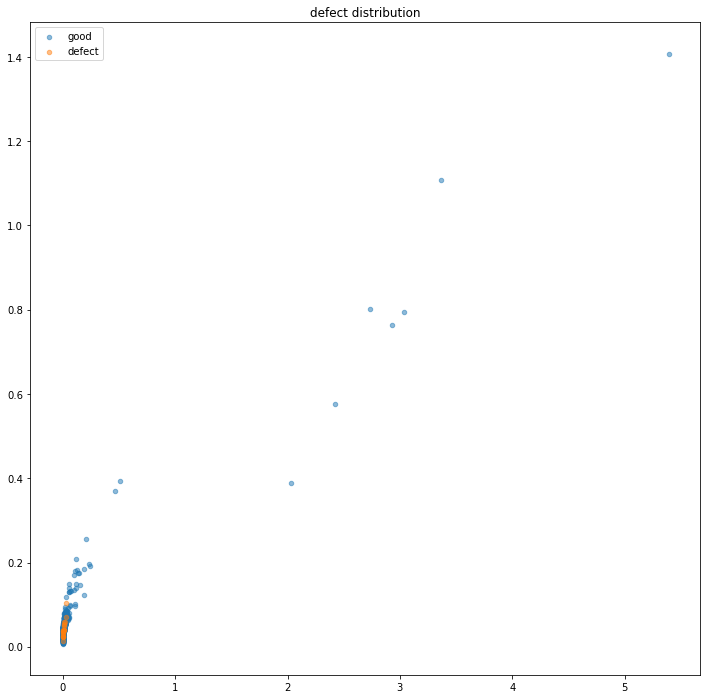

In [357]:
df_0=clust_label0_goodfeats.join(clust_label_0_defect)
plot_targets(df_0)
df_0.shape

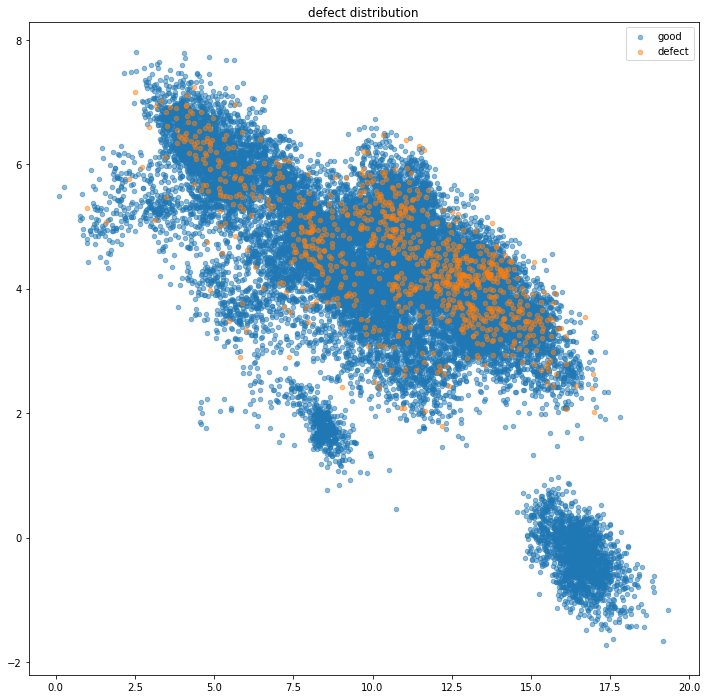

In [358]:
plot_targets(data_1)

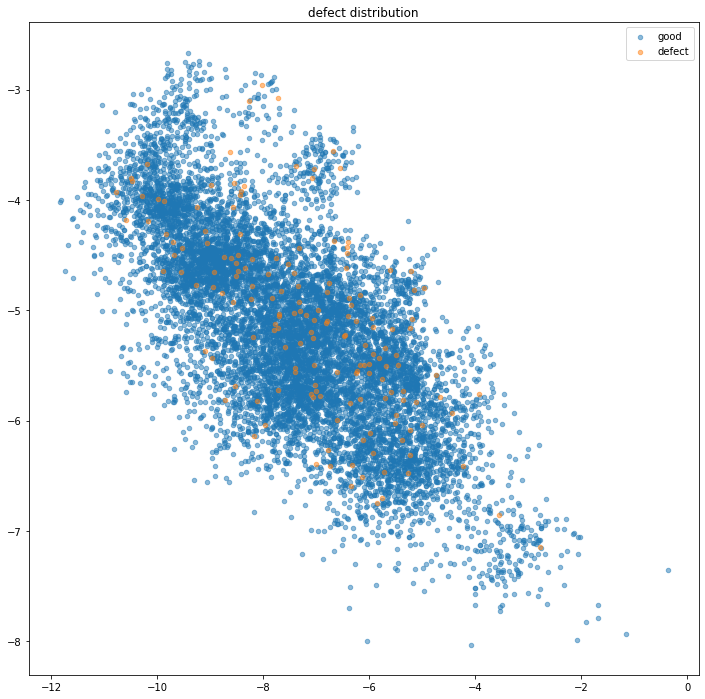

In [68]:
plot_targets(data_2)

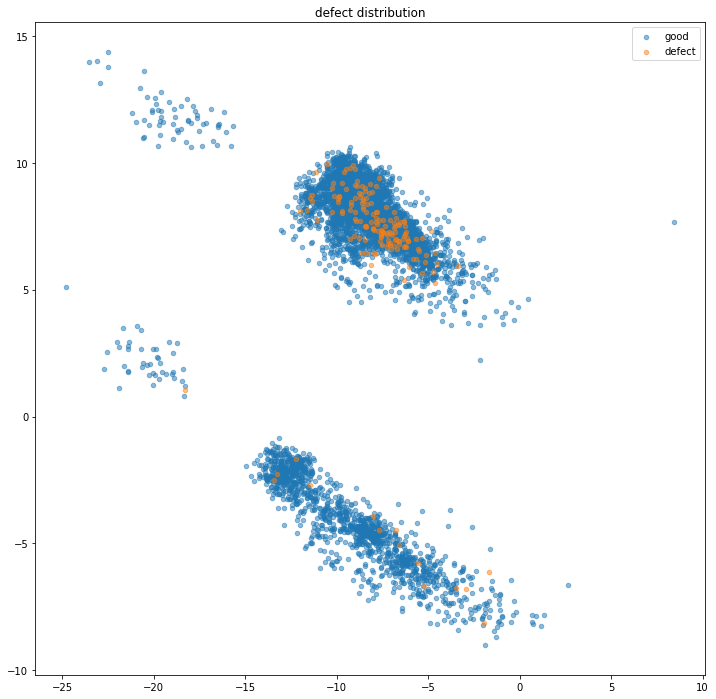

In [69]:
plot_targets(data_3)

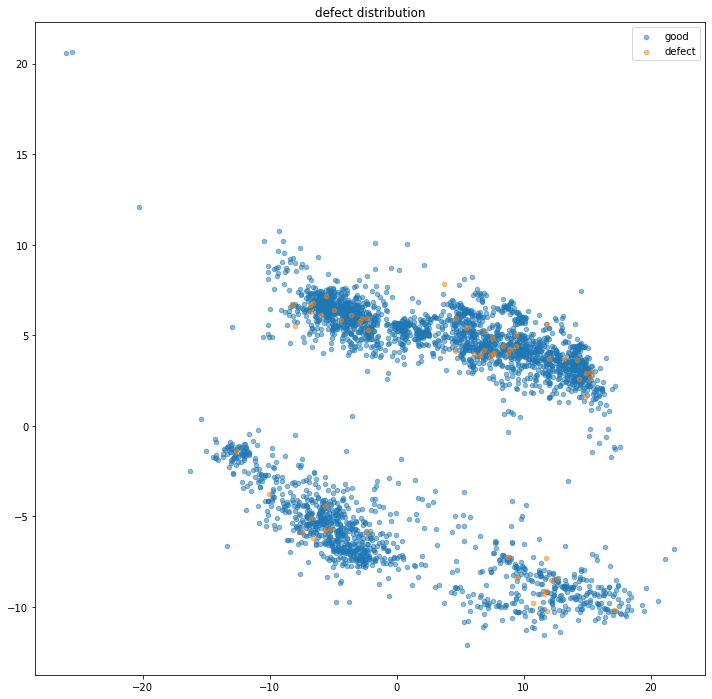

In [70]:
plot_targets(data_4)

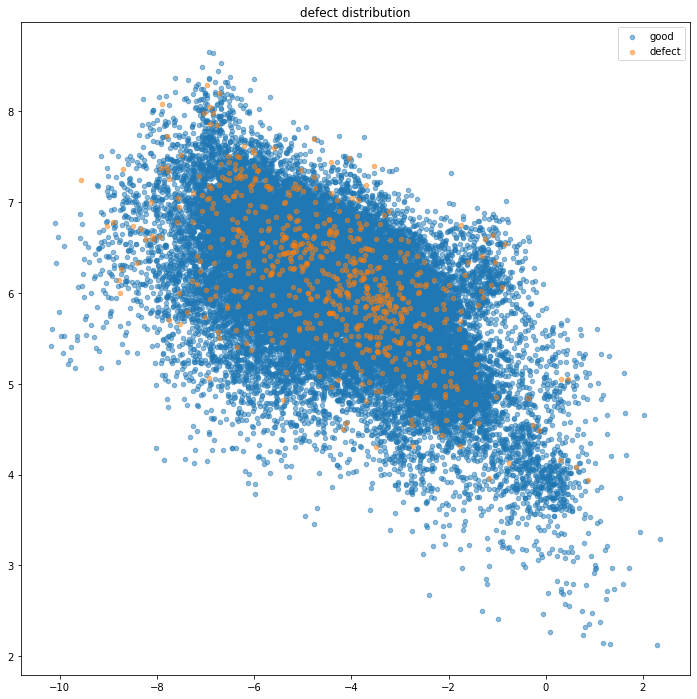

In [71]:
plot_targets(data_5)

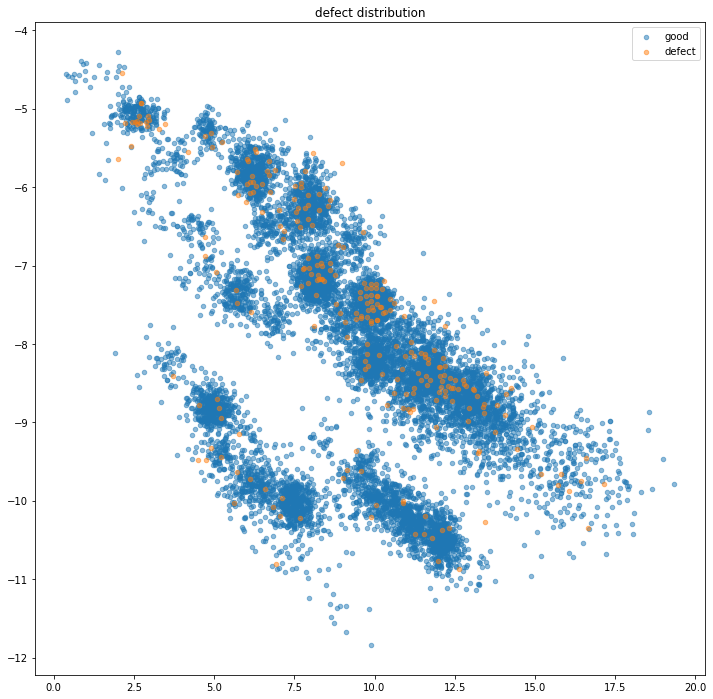

In [72]:
plot_targets(data_6)

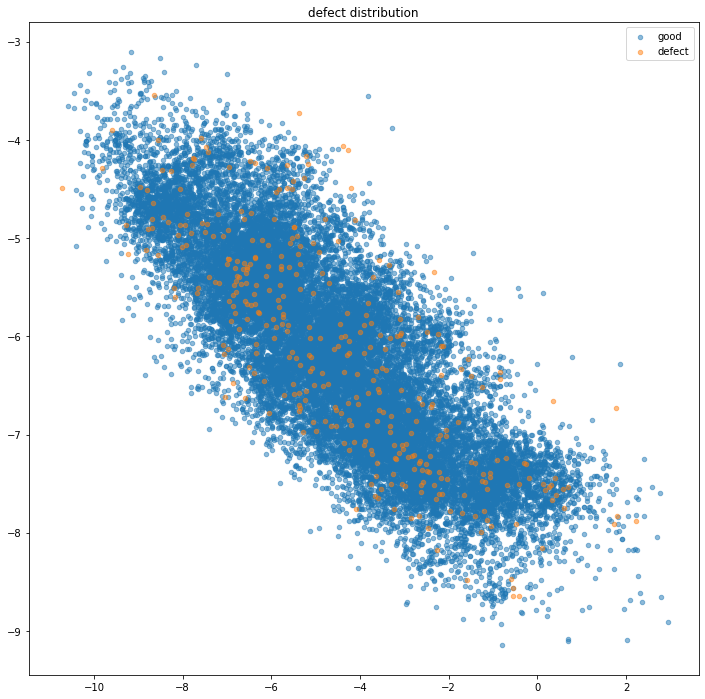

In [73]:
plot_targets(data_7)

In [190]:
data_3.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,cluster_label,defect
32528,8.453430,7.652725,17.852567,12.298116,28.273757,6.728697,-0.244465,-8.565103,7.889270,-24.295634,...,-2.757709,0.279814,8.627500,3.517435,-3.619541,-4.192473,-5.722882,0.776932,3.0,0.0
37226,-10.115224,5.192770,5.044148,-2.722477,-0.263286,2.495682,-1.027004,-1.859257,3.459760,4.108694,...,-1.177501,0.392359,-1.387539,-0.377400,-1.488345,-0.326473,1.019738,0.710689,3.0,0.0
38418,-2.206789,-7.491381,-0.730760,7.457967,-2.886718,-0.675689,0.521181,-7.983279,8.287315,-9.359252,...,-0.658338,0.189033,-0.562604,0.869646,0.079028,-0.218142,-0.579864,-0.182181,3.0,0.0
38949,-5.411223,-7.093467,-1.295843,0.152473,-1.356272,0.895314,-0.085540,-0.048146,4.651314,2.632721,...,-0.210573,0.119198,0.197422,-2.388715,-0.890056,-0.982177,-0.272374,0.629676,3.0,0.0
39189,-20.269366,1.632980,22.252960,-3.964068,9.265330,-2.755211,0.732924,0.658078,21.721658,14.468975,...,-0.154205,-0.266911,-4.033380,-1.846982,-1.165002,-0.938735,-1.800276,2.083908,3.0,0.0


In [367]:
import pickle
#write the model
with open(r'D:\Project_tasks\regression model\gmm.pickle', 'wb') as f:
    pickle.dump(gmm, f)
#to load the model
with open('gmm.pickle', 'rb') as f:
    gmm = pickle.load(f)

In [350]:
total_data_df['cluster_label']=gmm_label.tolist()

In [351]:
group_d=group_by(total_data_df,'cluster_label')
len(group_d)

8

In [352]:
clus_lis=[]
clus_data=clus_individual_df(group_d,clus_lis)

In [353]:
clust_label_0=clus_data[0]
clust_label_1=clus_data[1]
clust_label_2=clus_data[2]
clust_label_3=clus_data[3]
clust_label_4=clus_data[4]
clust_label_5=clus_data[5]
clust_label_6=clus_data[6]
clust_label_7=clus_data[7]

In [363]:
def feat_names(empty_list,cluster,cluster_column): #list,cluster_standard_deviation,original_cluster
    for value in range(len(cluster)):
        if cluster[value] >0.1:
            empty_list.append(cluster_column.columns[value])
    return empty_list

112

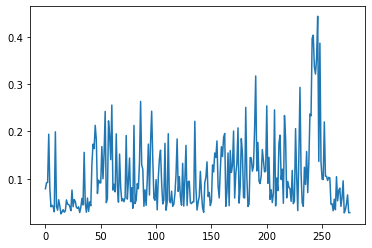

In [365]:
clust_label_0=clus_data[0]
clust_label_0_defect=clust_label_0.loc[:, ['defect']]
clust_label_0= clust_label_0.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_0.shape
clust_label_0.head()
#scaled minmax
clus_0_scaled=scaler.fit_transform(clust_label_0)
clus_0_std=pd.Series(clus_0_scaled.std(axis=0)).values
plt.plot(clus_0_std)
clus_0_list=[]
clus_0_featnames=feat_names(clus_0_list,clus_0_std,clust_label_0)
len(clus_0_featnames)

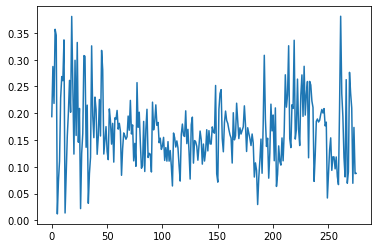

239

In [366]:
clust_label_1=clus_data[1]
clust_label_1= clust_label_1.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_1.shape
clust_label_1.head()
clus_1_scaled=scaler.fit_transform(clust_label_1)
clus_1_std=pd.Series(clus_1_scaled.std(axis=0)).values
plt.plot(clus_1_std)
#plt.xlim(252,270)
plt.show()
clus_1_list=[]
clus_1_featnames=feat_names(clus_1_list,clus_1_std,clust_label_1)
len(clus_1_featnames)

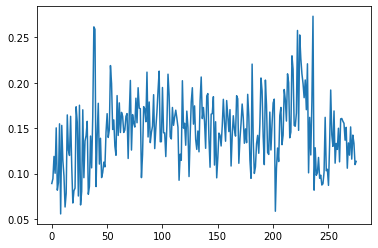

In [244]:
clust_label_2=clus_data[2]
clust_label_2= clust_label_2.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_2.shape
clust_label_2.head()
clus_2_scaled=scaler.fit_transform(clust_label_2)
clus_2_std=pd.Series(clus_2_scaled.std(axis=0)).values
plt.plot(clus_2_std)
plt.show()

(252, 270)

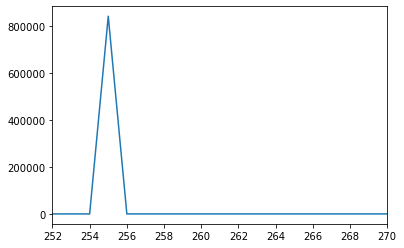

In [208]:
clust_label_2=clus_data[2]
clust_label_2= clust_label_2.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_2.shape
clust_label_2.head()
clus_2_std=pd.Series(clust_label_2.std(axis=0)).values
plt.plot(clus_2_std)
plt.xlim(252,270)

(252, 270)

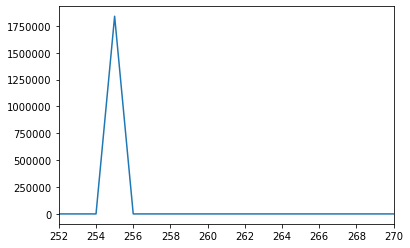

In [207]:
clust_label_3=clus_data[3]
clust_label_3= clust_label_3.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_3.shape
clust_label_3.head()
clus_3_std=pd.Series(clust_label_3.std(axis=0)).values
plt.plot(clus_3_std)
plt.xlim(252,270)

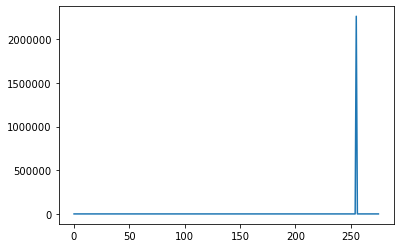

In [210]:
clust_label_4=clus_data[4]
clust_label_4= clust_label_4.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_4.shape
clust_label_4.head()
clus_4_std=pd.Series(clust_label_4.std(axis=0)).values
plt.plot(clus_4_std)
#plt.xlim(252,270)

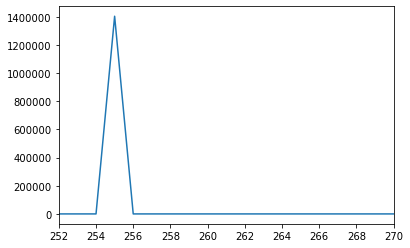

In [219]:
clust_label_5=clus_data[5]
clust_label_5= clust_label_5.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_5.shape
clust_label_5.head()
clus_5_std=pd.Series(clust_label_5.std(axis=0)).values
plt.plot(clus_5_std)
plt.xlim(252,270)
plt.show()
clust_label_5.iloc[:,254:27]

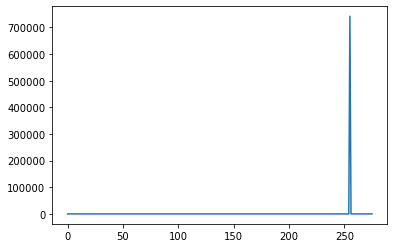

In [213]:
clust_label_6=clus_data[6]
clust_label_6= clust_label_6.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
clust_label_6.shape
clust_label_6.head()
clus_6_std=pd.Series(clust_label_6.std(axis=0)).values
plt.plot(clus_6_std)

(23321, 276)


(252, 270)

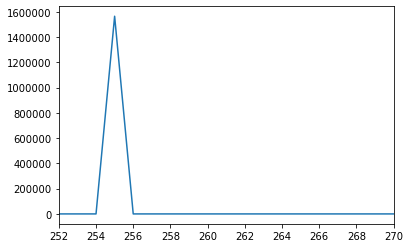

In [225]:
clust_label_7=clus_data[7]
clust_label_7= clust_label_7.drop([ 'defect_smoothed','max_ratio','min_ratio','defect','Part','cluster_label'], axis=1)
print(clust_label_7.shape)
clust_label_7.head()
clus_7_std=pd.Series(clust_label_7.std(axis=0)).values
plt.plot(clus_7_std)
plt.xlim(252,270)

In [229]:
clust_label_7.shape

(23321, 276)

In [ ]:
#use min max scaler